# Digit Recognizer with Convolutional Nets

## Galen Wilkerson

Kaggle Competition:

https://www.kaggle.com/c/digit-recognizer

Based on models in:

Chollet, Francois. Deep learning with python. Manning Publications Co., 2017.

## Baseline quickstart

In [1]:
from keras import layers
from keras import models

import numpy as np
import pandas as pd

from keras.utils import to_categorical

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

Using TensorFlow backend.


In [2]:
model = models.Sequential()

# convolutional and maxpooling layers for image processing
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# dense layers for classification
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

### Read and reshape data

In [68]:
df = pd.read_csv('./train.csv.gz', compression='gzip', header = 0, index_col=None)
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
# the classes
train_labels = df.pop('label').values

# the images
train_images = df.values

In [70]:
# images are flat, make them square again
train_images = train_images.reshape((42000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

### Show first image

In [71]:
train_images[0, :, :, 0].shape

(28, 28)

<IPython.core.display.Javascript object>


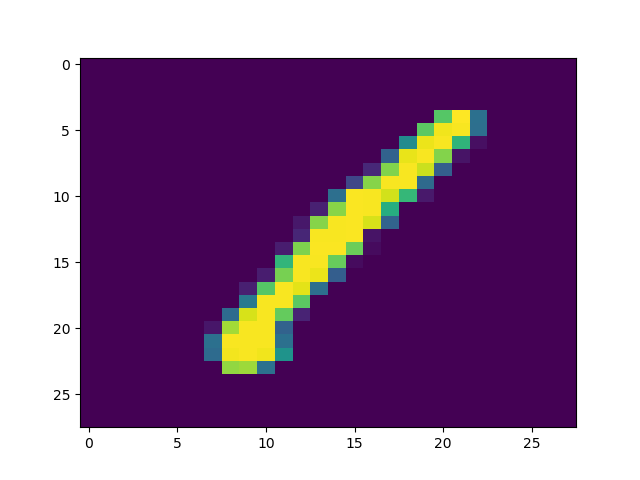

In [72]:
image0 = train_images[0, :, :, 0]

plt.imshow(image0,aspect="auto")
plt.show();

### Train baseline network on reshaped images 

In [7]:
train_labels = to_categorical(train_labels)

model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
42000/42000 [==============================] - 53s - loss: 0.2186 - acc: 0.9319     

### predict from test data using the trained model

In [60]:
df_test = pd.read_csv('./test.csv.gz', compression = "gzip", index_col=None)

df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
# the images
test_images = df_test.values

In [77]:
test_images.shape

(28000, 784)

In [78]:
# test images are flat, make them square again
test_images = test_images.reshape((28000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [ ]:
# generate the predictions using the trained model

y_pred = model.predict_classes(test_images)

15936/28000 [================>.............] - ETA: 5s 

In [14]:
y_pred

array([2, 0, 9, ..., 3, 9, 2])

In [26]:
# save predictions to file

df_pred = pd.DataFrame({"ImageId": list(range(1, len(y_pred) + 1)), "Label": y_pred})

df_pred.to_csv('predictions.csv', index=False)